In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.8 MB/s eta 0:00:00


In [2]:
!pip install torch tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)


In [4]:
!kaggle datasets download -d vijaydevane/blooms-taxonomy-dataset


Dataset URL: https://www.kaggle.com/datasets/vijaydevane/blooms-taxonomy-dataset
License(s): apache-2.0
  0% 0.00/240k [00:00<?, ?B/s]
100% 240k/240k [00:00<00:00, 80.6MB/s]


Extraction of Zip File

In [5]:
import zipfile

zip_path = "blooms-taxonomy-dataset.zip"
extract_path = "blooms_taxonomy_data"

# Extract ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
import os
os.listdir(extract_path)


['blooms_taxonomy_dataset.csv']

In [6]:
import pandas as pd

df = pd.read_csv("blooms_taxonomy_data/blooms_taxonomy_dataset.csv")
df.head()  # Display the first 5 rows



,Questions,Category
0,About what proportion of the population of the...,BT1
1,Correctly label the brain lobes indicated on t...,BT1
2,Define compound interest.,BT1
3,Define four types of traceability,BT1
4,Define mercantilism.,BT1


Importing necessary Libraries for Fine tuning

In [7]:
import numpy as np
import pandas as pd
import time
import datetime
import gc
import random
from nltk.corpus import stopwords
import re

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Preprocess text data

In [10]:
import re
import nltk
from nltk.corpus import stopwords
'''
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['clean_text'] = df['Questions'].apply(clean_text)  # Apply cleaning function
df.head()
'''

'\nnltk.download(\'stopwords\')\nstop_words = set(stopwords.words(\'english\'))\n\ndef clean_text(text):\n    text = text.lower()  # Convert to lowercase\n    text = re.sub(r\'\\W\', \' \', text)  # Remove special characters\n    text = re.sub(r\'\\s+\', \' \', text)  # Remove extra spaces\n    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords\n    return text\n\ndf[\'clean_text\'] = df[\'Questions\'].apply(clean_text)  # Apply cleaning function\ndf.head()\n'

Convert Label to numbers

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Category'])  # Encode labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'BT1': 0, 'BT2': 1, 'BT3': 2, 'BT4': 3, 'BT5': 4, 'BT6': 5}


Split dataset to train and test data

In [12]:
from sklearn.model_selection import train_test_split

train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['Questions'], df['label'], test_size=0.2, random_state=42
)


In [13]:
print(type(train_labels))  # Should be list, NumPy array, or Pandas Series
print(type(val_labels))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
'''
token_lengths = [len(tokenizer(text)['input_ids']) for text in train_texts]

print("Max token length:", np.max(token_lengths))
print("Average token length:", np.mean(token_lengths))
print("90th percentile length:", np.percentile(token_lengths, 90))
'''
train_encodings = tokenizer(
    train_texts.tolist(),  # Convert Pandas series to a list
    padding=True,  # Pad sequences to max length
    truncation=True,  # Truncate if longer than model max length
    max_length=512,  # Set max sequence length (adjust as needed)
    return_tensors="pt"  # Return PyTorch tensors
)

val_encodings = tokenizer(
    val_texts.tolist(),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="pt"
)
train_labels = torch.tensor(train_labels.tolist(), dtype=torch.long)
val_labels = torch.tensor(val_labels.tolist(), dtype=torch.long)

Tensor dataset


In [17]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    train_labels
)

val_dataset = TensorDataset(
    val_encodings['input_ids'],
    val_encodings['attention_mask'],
    val_labels
)



In [29]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Batch size
batch_size = 16  # Adjust based on GPU memory

# Define train DataLoader
train_dataloader = DataLoader(
    train_dataset,
    sampler=RandomSampler(train_dataset),
    batch_size=batch_size
)

# Define validation DataLoader
val_dataloader = DataLoader(
    val_dataset,
    sampler=SequentialSampler(val_dataset),
    batch_size=batch_size
)


In [34]:
# Load Pretrained BERT model for Classification
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_mapping)  # Number of Bloom's Taxonomy categories
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e


🔹 Training with Learning Rate: 5e-05, Epochs: 2
Class Weights: tensor([0.0786, 0.1132, 0.1325, 0.1603, 0.2658, 0.2495], device='cuda:0')


Epoch 1/2: 100%|██████████| 439/439 [02:33<00:00,  2.86it/s, Loss=0.447]


Epoch 1 - Average Training Loss: 0.8556


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.38it/s]


  ✅ Accuracy: 79.6465% | 🎯 Precision: 0.8141 | 🔄 Recall: 0.7965 | 🏆 F1-score: 0.7918
✅ Validation Loss: 0.5724


Epoch 2/2: 100%|██████████| 439/439 [02:32<00:00,  2.88it/s, Loss=0.188]


Epoch 2 - Average Training Loss: 0.4291


Validating: 100%|██████████| 110/110 [00:08<00:00, 12.42it/s]


  ✅ Accuracy: 81.2429% | 🎯 Precision: 0.8176 | 🔄 Recall: 0.8124 | 🏆 F1-score: 0.8109
✅ Validation Loss: 0.5134

📊 Final Results Table:
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+
|    |   Learning Rate |   Epoch |   Train Loss |   Val Loss |   Accuracy |   Precision |   Recall |   F1 Score |
+====+=================+=========+==============+============+============+=============+==========+============+
|  0 |           5e-05 |       1 |     0.855591 |   0.572429 |   0.796465 |    0.814105 | 0.796465 |   0.791838 |
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+
|  1 |           5e-05 |       2 |     0.429104 |   0.513376 |   0.812429 |    0.81758  | 0.812429 |   0.810895 |
+----+-----------------+---------+--------------+------------+------------+-------------+----------+------------+


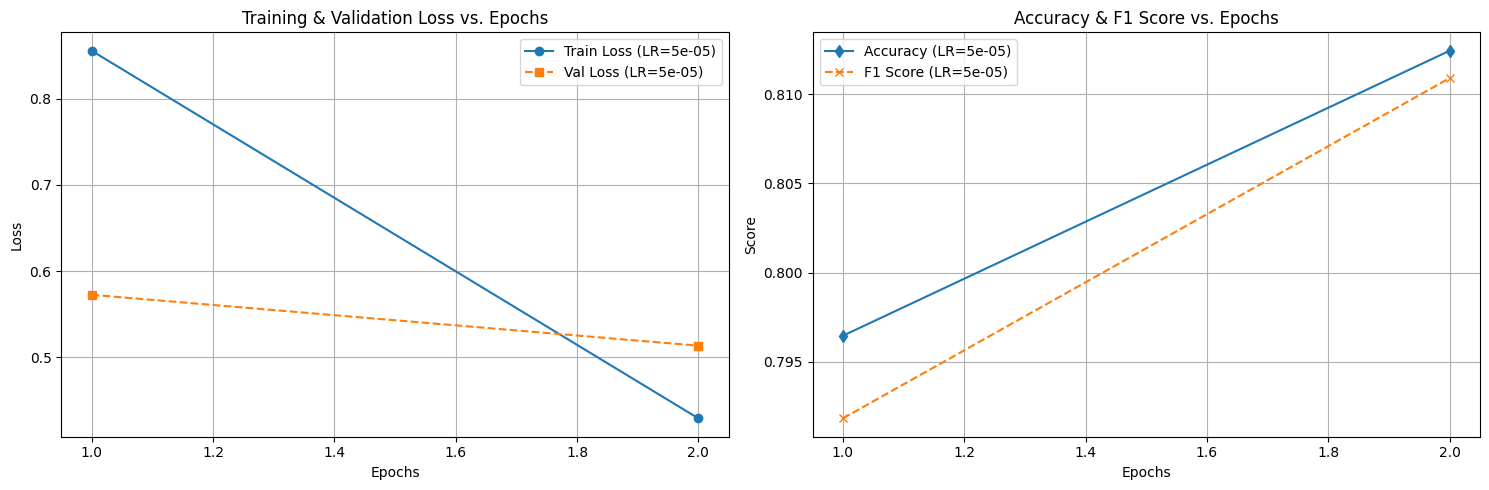

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from transformers import get_scheduler
from torch.optim import AdamW
import torch
import torch.nn as nn
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Hyperparameter settings
epoch_values = [2]
learning_rates = [5e-5]

# Dictionary to store results
results = []

for lr in learning_rates:
    for epochs in epoch_values:
        print(f"\n🔹 Training with Learning Rate: {lr}, Epochs: {epochs}")

        # Define optimizer and scheduler
        optimizer = AdamW(model.parameters(), lr=lr, eps=1e-8)
        total_steps = len(train_dataloader) * epochs
        scheduler = get_scheduler("linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=total_steps)


# Compute class counts
        train_label_counts = torch.bincount(train_labels)  # Get counts of each label
        total_samples = len(train_labels)  # Total number of training samples

# Compute class weights (Inverse Frequency)
        class_weights = total_samples / (len(train_label_counts) * train_label_counts.float())

# Normalize the weights
        class_weights = class_weights / class_weights.sum()

# Move to GPU if available
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        class_weights = class_weights.to(device)
        loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))
       # loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)
        print("Class Weights:", class_weights)


        # Lists to store per-epoch metrics
        train_losses, val_losses, accuracies, f1_scores = [], [], [], []

        for epoch in range(epochs):
            model.train()
            total_loss = 0

            progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", leave=True)

            for batch in progress_bar:
                batch_inputs, batch_masks, batch_labels = [t.to(device) for t in batch]
                optimizer.zero_grad()
                outputs = model(input_ids=batch_inputs, attention_mask=batch_masks, labels=batch_labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                scheduler.step()

                total_loss += loss.item()
                progress_bar.set_postfix({"Loss": loss.item()})

            avg_train_loss = total_loss / len(train_dataloader)
            print(f"Epoch {epoch+1} - Average Training Loss: {avg_train_loss:.4f}")

            # 🔍 Validation
            model.eval()
            all_preds, all_labels = [], []
            total_val_loss = 0

            with torch.no_grad():
                progress_bar = tqdm(val_dataloader, desc="Validating")
                for batch in progress_bar:
                    batch_inputs, batch_masks, batch_labels = [t.to(device) for t in batch]
                    outputs = model(input_ids=batch_inputs, attention_mask=batch_masks, labels=batch_labels)
                    loss = outputs.loss
                    total_val_loss += loss.item()
                    predictions = torch.argmax(outputs.logits, dim=1)
                    all_preds.extend(predictions.cpu().numpy())
                    all_labels.extend(batch_labels.cpu().numpy())

            # Compute metrics
            acc = accuracy_score(all_labels, all_preds)
            precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average="weighted")
            avg_val_loss = total_val_loss / len(val_dataloader)

            print(f"  ✅ Accuracy: {acc:.4%} | 🎯 Precision: {precision:.4f} | 🔄 Recall: {recall:.4f} | 🏆 F1-score: {f1:.4f}")
            print(f"✅ Validation Loss: {avg_val_loss:.4f}")

            # Store results
            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)
            accuracies.append(acc)
            f1_scores.append(f1)

            # Append data to results list
            results.append([lr, epoch + 1, avg_train_loss, avg_val_loss, acc, precision, recall, f1])

# 📌 Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Learning Rate", "Epoch", "Train Loss", "Val Loss", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\n📊 Final Results Table:")
print(tabulate(df_results, headers="keys", tablefmt="grid"))

# 📊 Plot graphs
plt.figure(figsize=(15, 5))

# 📉 Training & Validation Loss
plt.subplot(1, 2, 1)
for lr in learning_rates:
    df_lr = df_results[df_results["Learning Rate"] == lr]
    plt.plot(df_lr["Epoch"], df_lr["Train Loss"], marker='o', linestyle='-', label=f'Train Loss (LR={lr})')
    plt.plot(df_lr["Epoch"], df_lr["Val Loss"], marker='s', linestyle='--', label=f'Val Loss (LR={lr})')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss vs. Epochs")
plt.legend()
plt.grid(True)

# 🎯 Accuracy & F1 Score
plt.subplot(1, 2, 2)
for lr in learning_rates:
    df_lr = df_results[df_results["Learning Rate"] == lr]
    plt.plot(df_lr["Epoch"], df_lr["Accuracy"], marker='d', linestyle='-', label=f'Accuracy (LR={lr})')
    plt.plot(df_lr["Epoch"], df_lr["F1 Score"], marker='x', linestyle='--', label=f'F1 Score (LR={lr})')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Accuracy & F1 Score vs. Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [36]:
save_directory = "/content/drive/MyDrive/bert-blooms-taxonomy-classifier"
model.save_pretrained(save_directory)
tokenizer.save_pretrained(save_directory)

('/content/drive/MyDrive/bert-blooms-taxonomy-classifier/tokenizer_config.json',
 '/content/drive/MyDrive/bert-blooms-taxonomy-classifier/special_tokens_map.json',
 '/content/drive/MyDrive/bert-blooms-taxonomy-classifier/vocab.txt',
 '/content/drive/MyDrive/bert-blooms-taxonomy-classifier/added_tokens.json')

In [37]:
!pip install huggingface_hub
!huggingface-cli login
from huggingface_hub import notebook_login
notebook_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `cipb14` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate w

In [38]:
model_name = "cip29/blooms_bert"

# Load your trained model and tokenizer
model = BertForSequenceClassification.from_pretrained(save_directory)
tokenizer = BertTokenizer.from_pretrained( save_directory)

# Push model to Hugging Face
model.push_to_hub(model_name)
tokenizer.push_to_hub(model_name)

print(f"Model pushed successfully! You can find it at: https://huggingface.co/{model_name}")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


Model pushed successfully! You can find it at: https://huggingface.co/cip29/blooms_bert


In [62]:


# Load test dataset (Excel format)
#test_df = pd.read_excel("Testing_Dataset.xlsx")
test_df = pd.read_excel("/content/drive/My Drive/Testing_Dataset.xlsx")  # If using Google Colab

# Display a few samples
print(test_df.head())



   Sno                                           Question            Domain  \
0    1                           Define Machine Learning.  Machine Learning   
1    2  Differentiate between Supervised and Unsupervi...  Machine Learning   
2    3  Apply k-NN algorithm on a given dataset and cl...  Machine Learning   
3    4  Compare Decision Trees and Random Forests in t...  Machine Learning   
4    5  Design a recommendation system using collabora...  Machine Learning   

  Blooms Taxonomy level  
0           Remembering  
1         Understanding  
2              Applying  
3             Analyzing  
4              Creating  


In [69]:

from sklearn.metrics import accuracy_score, classification_report

# Load Pretrained Model & Tokenizer
model_name = "cip29/blooms_bert"  # Change to your fine-tuned model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=6)

# Move Model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Bloom's Taxonomy Labels
bloom_labels = ["Remembering", "Understanding", "Applying", "Analyzing", "Evaluating", "Creating"]
label_mapping = {label: idx for idx, label in enumerate(bloom_labels)}

# Load Test Dataset (Ensure file exists in your working directory)
test_df = pd.read_excel("/content/drive/My Drive/Testing_Dataset.xlsx")  # If using Google Colab


# Ensure "Question" and "Blooms Taxonomy level" columns exist
if "Question" not in test_df.columns or "Blooms Taxonomy level" not in test_df.columns:
    raise ValueError("Ensure your test dataset has 'Question' and 'Blooms Taxonomy level' columns.")

# Convert True Labels to Numeric (if they are categorical)
test_df["Blooms Taxonomy level"] = test_df["Blooms Taxonomy level"].map(label_mapping)

# Preprocessing Function (Tokenization)
def preprocess_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts.tolist(), padding=True, truncation=True, max_length=max_length, return_tensors="pt")

# Tokenize Test Questions
test_encodings = preprocess_texts(test_df["Question"], tokenizer)

# Inference in Batches
batch_size = 16  # Adjust based on GPU memory
all_predictions = []

for i in range(0, len(test_df), batch_size):
    batch_inputs = test_encodings["input_ids"][i : i + batch_size].to(device)
    batch_masks = test_encodings["attention_mask"][i : i + batch_size].to(device)

    with torch.no_grad():
        outputs = model(input_ids=batch_inputs, attention_mask=batch_masks)
        batch_preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()
        all_predictions.extend(batch_preds)

# Store Predictions in DataFrame
test_df["predicted_category"] = all_predictions

# Compute Accuracy
accuracy = accuracy_score(test_df["Blooms Taxonomy level"], test_df["predicted_category"])
print(f"📊 Model Accuracy: {accuracy:.4f}")  # Prints accuracy up to 4 decimal places

# Classification Report (Precision, Recall, F1-score)
print("\n📢 Classification Report:\n")
print(classification_report(test_df["Blooms Taxonomy level"], test_df["predicted_category"], target_names=bloom_labels))

# Display Sample Predictions
print("\n📝 Sample Predictions:\n")
print(test_df[["Question", "Blooms Taxonomy level", "predicted_category"]].head(20))



📊 Model Accuracy: 0.7900

📢 Classification Report:

               precision    recall  f1-score   support

  Remembering       0.67      1.00      0.80        14
Understanding       0.86      0.43      0.57        14
     Applying       0.61      1.00      0.76        14
    Analyzing       0.77      0.71      0.74        14
   Evaluating       0.95      0.70      0.81        30
     Creating       1.00      1.00      1.00        14

     accuracy                           0.79       100
    macro avg       0.81      0.81      0.78       100
 weighted avg       0.83      0.79      0.78       100


📝 Sample Predictions:

                                             Question  Blooms Taxonomy level  \
0                            Define Machine Learning.                      0   
1   Differentiate between Supervised and Unsupervi...                      1   
2   Apply k-NN algorithm on a given dataset and cl...                      2   
3   Compare Decision Trees and Random Forests in t.